In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanicdata.csv')
print(df.head())
print(df.shape)

   Survived  Pclass  Sex   Age
0         0       3    2  22.0
1         1       1    1  38.0
2         1       3    1  26.0
3         1       1    1  35.0
4         0       3    2  35.0
(891, 4)


In [3]:
# Print the class distribution
print("Number of non-survived passengers: ", df[df.Survived == 0].shape[0])
print("Number of survived passengers: ", df[df.Survived == 1].shape[0])

Number of non-survived passengers:  549
Number of survived passengers:  342


In [4]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Extract X and y
X = df.drop(['Survived'], axis=1).values
y = df.Survived.values

# Use train_test_split
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 123)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = 0.2, stratify = y_train1, random_state = 1234)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

In [5]:
print("Shape of training: ", X_train.shape[0])
print("Negative Samples: ", y_train[y_train == 0].shape[0])
print("Positive Samples: ", y_train[y_train == 1].shape[0])


print("Shape of validation: ", X_val.shape[0])
print("Negative Samples: ", y_val[y_val == 0].shape[0])
print("Positive Samples: ", y_val[y_val == 1].shape[0])


print("Shape of test: ", X_test.shape[0])
print("Negative Samples: ", y_test[y_test == 0].shape[0])
print("Positive Samples: ", y_test[y_test == 1].shape[0])

Shape of training:  569
Negative Samples:  351
Positive Samples:  218
Shape of validation:  143
Negative Samples:  88
Positive Samples:  55
Shape of test:  179
Negative Samples:  110
Positive Samples:  69


In [7]:
scale = MinMaxScaler()

scale.fit(X_train)

X_train = scale.transform(X_train)
X_val = scale.transform(X_val)
X_test = scale.transform(X_test)

In [8]:
def gradient(X, y, y_hat):
    
    #dw = (1/X.shape[0])*np.dot(X.T, (y_hat - y))
    #db = (1/X.shape[0])*np.sum((y_hat - y)) 
    
    dw = (1/X.shape[0])*np.dot(X.T, (y - y_hat))
    db = (1/X.shape[0])*np.sum((y - y_hat)) 
    
    return dw, db

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
def train(X, y, epochs, lr):

    n_samples, n_features= X.shape
    w=np.zeros(n_features)
    b=0

    losses = []
    for epoch in range(epochs):
            
        linear=(np.dot(X, w) + b)
        y_hat = sigmoid(linear)
            
        dw, db = gradient(X, y, y_hat)
            
        w += lr*dw
        b += lr*db
                
        loss = 1/n_samples * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1-y_hat))
        losses.append(loss)
                
    return w, b, losses

In [11]:
def predict(X,w,b):
    
    linear=(np.dot(X, w) + b)
    preds = sigmoid(linear)
    
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [12]:
epochs=[10,50,100,150,200,250,300,350,400,450,500,1000,1500,2000]
lr=[0.5,0.4,0.3,0.2, 0.1,0.001,0.001,0.0001,0.05,0.005,0.0005]

In [13]:
for i in epochs:
    for j in lr:
        w, b,losses= train(X_train, y_train,i,j)
        prediction=predict(X_val,w,b)
        print("Epoch: " ,i, "Learning Rate: ", j, "Accuracy: " ,accuracy_score(prediction,y_val)

)


        #plt.plot(np.arange(i),losses)
        #plt.xlabel(i)
        
        

Epoch:  10 Learning Rate:  0.5 Accuracy:  0.6153846153846154
Epoch:  10 Learning Rate:  0.4 Accuracy:  0.6153846153846154
Epoch:  10 Learning Rate:  0.3 Accuracy:  0.6153846153846154
Epoch:  10 Learning Rate:  0.2 Accuracy:  0.6153846153846154
Epoch:  10 Learning Rate:  0.1 Accuracy:  0.6153846153846154
Epoch:  10 Learning Rate:  0.001 Accuracy:  0.6153846153846154
Epoch:  10 Learning Rate:  0.001 Accuracy:  0.6153846153846154
Epoch:  10 Learning Rate:  0.0001 Accuracy:  0.6153846153846154
Epoch:  10 Learning Rate:  0.05 Accuracy:  0.6153846153846154
Epoch:  10 Learning Rate:  0.005 Accuracy:  0.6153846153846154
Epoch:  10 Learning Rate:  0.0005 Accuracy:  0.6153846153846154
Epoch:  50 Learning Rate:  0.5 Accuracy:  0.8181818181818182
Epoch:  50 Learning Rate:  0.4 Accuracy:  0.8251748251748252
Epoch:  50 Learning Rate:  0.3 Accuracy:  0.8251748251748252
Epoch:  50 Learning Rate:  0.2 Accuracy:  0.7342657342657343
Epoch:  50 Learning Rate:  0.1 Accuracy:  0.6153846153846154
Epoch:  50 

In [14]:
epochs=50
lr=0.3
w, b,losses= train(X_train, y_train,epochs,lr)
predictionTest=predict(X_test,w,b)

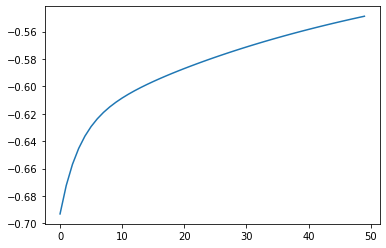

In [15]:
plt.plot(np.arange(epochs),losses)

In [17]:
accuracy_score(predictionTest,y_test)


0.8100558659217877